# Assignment 6
1. Use yeast dataset from UCI http://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data
2. Remove the first column and use the last column as the target
3. Only leave CYT and VAC classes
4. Replace [0.3, 0.5, 0.7] in feature 2 to null
5. Replace [0.26, 0.36, 0.64] in feature 3 to null
6. Split the data

7. Impute the data (or not, it's your call)
8. Build a outlier detection model to classify VAC from CYT, i.e. 0 from 1
9. Build a classifer using sample augmentation techniques to flassify VAC from CYT, i.e. 0 from 1
10. Try different methods and hyper paramters

11. Report perfromance using F-1 score

In [1152]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mglearn

from matplotlib import rc
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 25}
rc('font', **font) 

plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['lines.linewidth'] = 5.0
plt.rcParams['lines.markersize'] = 15.0


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

#plt.rcParams.keys()

Task-1 

In [1153]:
url ='https://people.arcada.fi/~atsmegit/data/ML-predctive/ML-data/yeast.data'
names = ['Sequence_Name','mcg', 'gvh', 'alm', 'mit', 'erl','pox','vac','nuc']
dataset = pd.read_csv(url, names=names, delim_whitespace=True)

In [1154]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1484 entries, ADT1_YEAST to G6PD_YEAST
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sequence_Name  1484 non-null   float64
 1   mcg            1484 non-null   float64
 2   gvh            1484 non-null   float64
 3   alm            1484 non-null   float64
 4   mit            1484 non-null   float64
 5   erl            1484 non-null   float64
 6   pox            1484 non-null   float64
 7   vac            1484 non-null   float64
 8   nuc            1484 non-null   object 
dtypes: float64(8), object(1)
memory usage: 115.9+ KB


In [1155]:
dataset.describe()

,Sequence_Name,mcg,gvh,alm,mit,erl,pox,vac
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.500121,0.499933,0.500034,0.261186,0.504717,0.007500,0.499885,0.276199
std,0.137299,0.123924,0.086670,0.137098,0.048351,0.075683,0.057797,0.106491
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


In [1156]:
dataset.index

Index(['ADT1_YEAST', 'ADT2_YEAST', 'ADT3_YEAST', 'AAR2_YEAST', 'AATM_YEAST',
       'AATC_YEAST', 'ABC1_YEAST', 'BAF1_YEAST', 'ABF2_YEAST', 'ABP1_YEAST',
       ...
       'YP52_YEAST', 'YP53_YEAST', 'YPT7_YEAST', 'R29A_YEAST', 'R29B_YEAST',
       'YUR1_YEAST', 'ZIP1_YEAST', 'ZNRP_YEAST', 'ZUO1_YEAST', 'G6PD_YEAST'],
      dtype='object', length=1484)

In [1157]:
dataset.drop('Sequence_Name', axis=1, inplace=True)
dataset.rename(columns={'nuc': 'target'}, inplace=True)

In [1196]:
dataset.isna().sum()#check for nan

mcg       0
gvh       0
alm       0
mit       0
erl       0
pox       0
vac       0
target    0
dtype: int64

In [1198]:
print(dataset.groupby('target').size())#check the classes of the target

target
CYT    463
ERL      5
EXC     35
ME1     44
ME2     51
ME3    163
MIT    244
NUC    429
POX     20
VAC     30
dtype: int64


In [1197]:
dataset_copy = dataset.copy()#copy the dataset

**Task-3 Only leave CYT and VAC classes**

In [1199]:
data_sub=dataset_copy[dataset_copy.target.isin(['CYT','VAC'])]


In [1200]:
data_sub.groupby('target').size()

target
CYT    463
VAC     30
dtype: int64

In [1201]:
data_sub

,mcg,gvh,alm,mit,erl,pox,vac,target
AATC_YEAST,0.40,0.56,0.17,0.5,0.5,0.49,0.22,CYT
ABP1_YEAST,0.39,0.60,0.15,0.5,0.0,0.58,0.30,CYT
ACH1_YEAST,0.42,0.57,0.35,0.5,0.0,0.53,0.25,CYT
ACT_YEAST,0.44,0.52,0.11,0.5,0.0,0.50,0.22,CYT
ACT2_YEAST,0.39,0.50,0.11,0.5,0.0,0.49,0.40,CYT
...,...,...,...,...,...,...,...,...
YP53_YEAST,0.50,0.50,0.18,0.5,0.0,0.46,0.22,CYT
YPT7_YEAST,0.48,0.54,0.25,0.5,0.0,0.50,0.22,CYT
R29A_YEAST,0.32,0.64,0.41,0.5,0.0,0.44,0.11,CYT
R29B_YEAST,0.40,0.66,0.35,0.5,0.0,0.43,0.11,CYT


**Task-4 Replace [0.3, 0.5, 0.7] in feature 2 to null**
<br>
**Task-5 Replace [0.26, 0.36, 0.64] in feature 3 to null**

In [1202]:
#Replace [0.3, 0.5, 0.7] in feature 2 to null
data_sub[['gvh']] = data_sub[['gvh']].replace((0.3, 0.5, 0.7), np.nan)


C:\Users\tamra\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [1203]:
#check nan values at mcg feature
data_sub[['gvh']].isna().sum()

gvh    40
dtype: int64

In [1204]:
#Replace [0.26, 0.36, 0.64] in feature 3 to null
data_sub[['alm']]= data_sub[['alm']].replace((0.26, 0.36, 0.64), np.nan)

In [1205]:
#check nan values at gvh feature
data_sub[['alm']].isna().sum()

alm    19
dtype: int64

In [1206]:
data_sub.isna().sum()

mcg        0
gvh       40
alm       19
mit        0
erl        0
pox        0
vac        0
target     0
dtype: int64

In [1207]:
data_sub.describe()

,mcg,gvh,alm,mit,erl,pox,vac
count,493.000000,453.000000,474.000000,493.000000,493.000000,493.000000,493.000000
mean,0.472941,0.533907,0.222658,0.504057,0.001014,0.500953,0.256836
std,0.095972,0.070960,0.115037,0.044900,0.022519,0.063487,0.092844
min,0.210000,0.260000,0.000000,0.500000,0.000000,0.130000,0.000000
25%,0.410000,0.490000,0.152500,0.500000,0.000000,0.480000,0.220000
50%,0.470000,0.530000,0.190000,0.500000,0.000000,0.510000,0.220000
75%,0.540000,0.570000,0.250000,0.500000,0.000000,0.540000,0.270000
max,0.820000,1.000000,1.000000,1.000000,0.500000,0.730000,0.800000


In [1208]:
#replace target classes "VAC": 0, "CYT" : 1
replace_list = {"target" : {"VAC": 0, "CYT" : 1}}
data_sub.replace(replace_list,inplace=True)

C:\Users\tamra\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


**Task-6 Split the data**
<br>
**Task-7 Impute the data (or not, it's your call)**

In [1210]:
X = data_sub.iloc[:,:-1]
y =data_sub.iloc[:,-1]

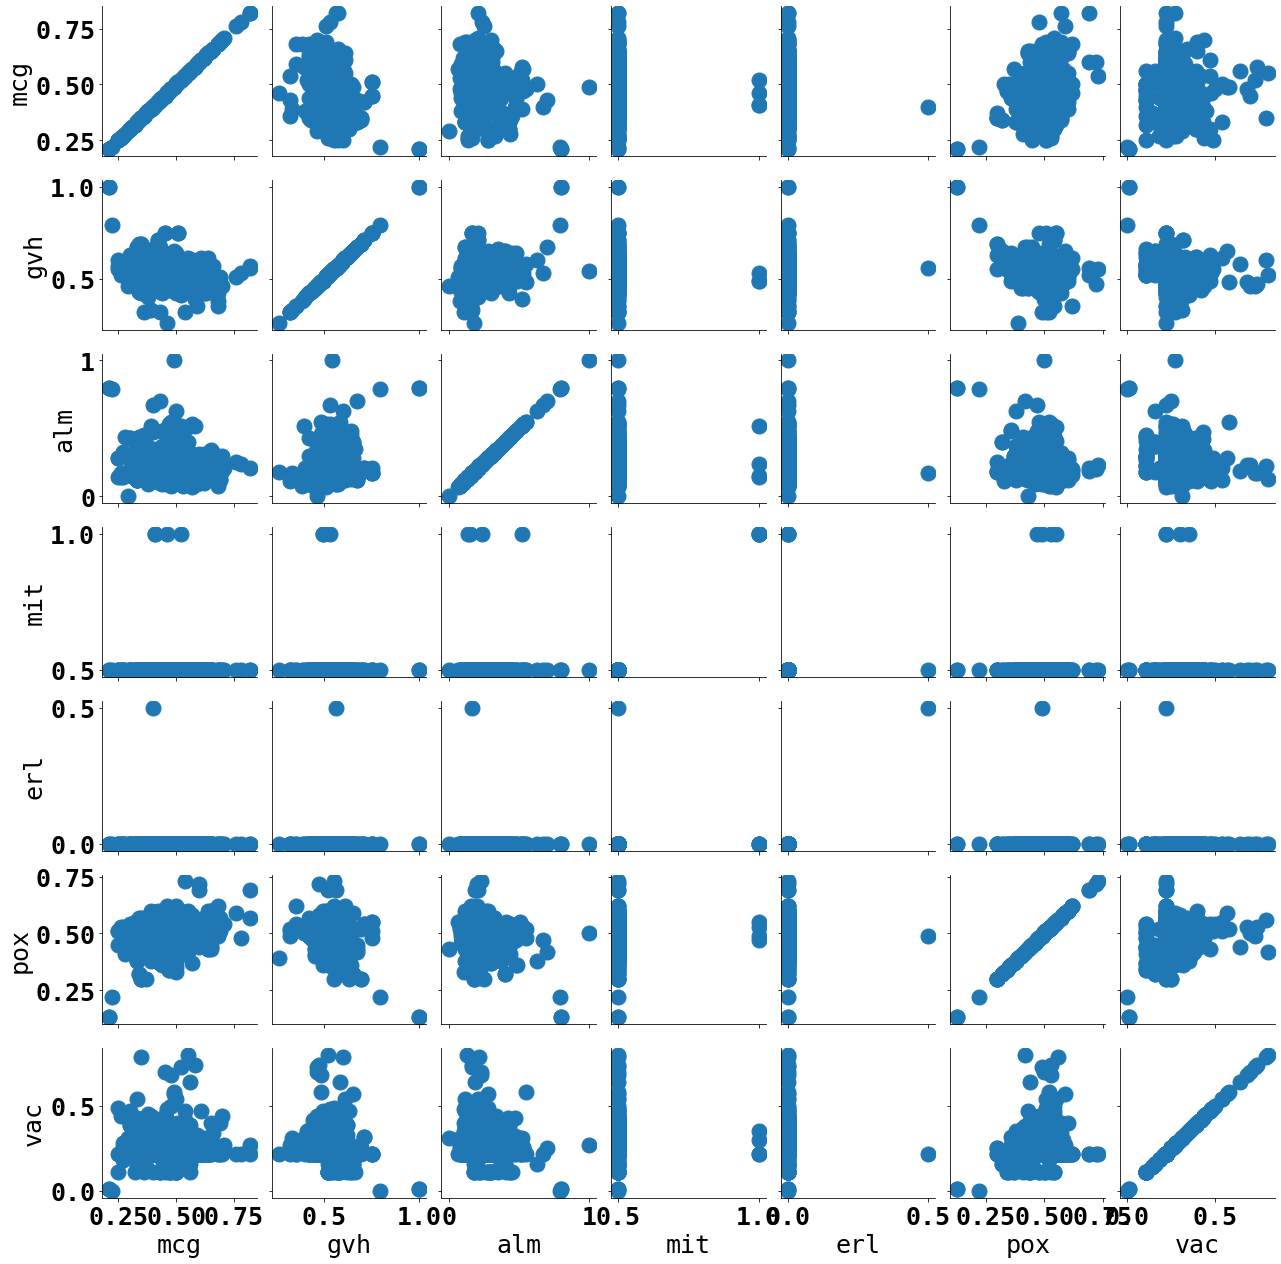

In [1211]:
#Grid plot
import seaborn as sns
g = sns.PairGrid(X)
g.map(plt.scatter) 

In [1216]:
#Impute the nan with the most fequent values 
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(X)

X=imp.transform(X)

In [1217]:
#Here I use linear regression model to train and predict.  

In [1218]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
pred = model.predict(X_test)
# evaluate predictions
#score = model.score(X_test, y_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.140


In [1219]:
#I used Isolation forest outlier detection method to detect and remove
#mean-sqare error to compare the test result before and after detection.

In [1220]:
from sklearn.ensemble import IsolationForest
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
pred = iso.fit_predict(X_train)
# select all rows that are not outliers
mask = pred != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
pred = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, pred)
print('MAE: %.3f' % mae)

(394, 7) (394,)
(354, 7) (354,)
MAE: 0.135


#Here the model detect and removed 40 outliers and achived MAE of 0.135 which is better than the baseline  0.140

In [1221]:
# we obtain the threshold value from the scores by using the quantile function. 
#Here, we'll get the lowest 5 percent of samples as the anomalies. 
from numpy import quantile, where, random
iforest = IsolationForest(n_estimators=100)
print(iforest)
iforest.fit(X_train)
scores = iforest.score_samples(X_train)
thresh = quantile(scores, .05)
print(thresh)

IsolationForest()
-0.5363507624763011


**Task-9 Build a outlier detection model to classify VAC from CYT, i.e. 0 from 1**

In [1229]:
print(y_train.value_counts())#Imbalanced 

1    336
0     18
Name: target, dtype: int64


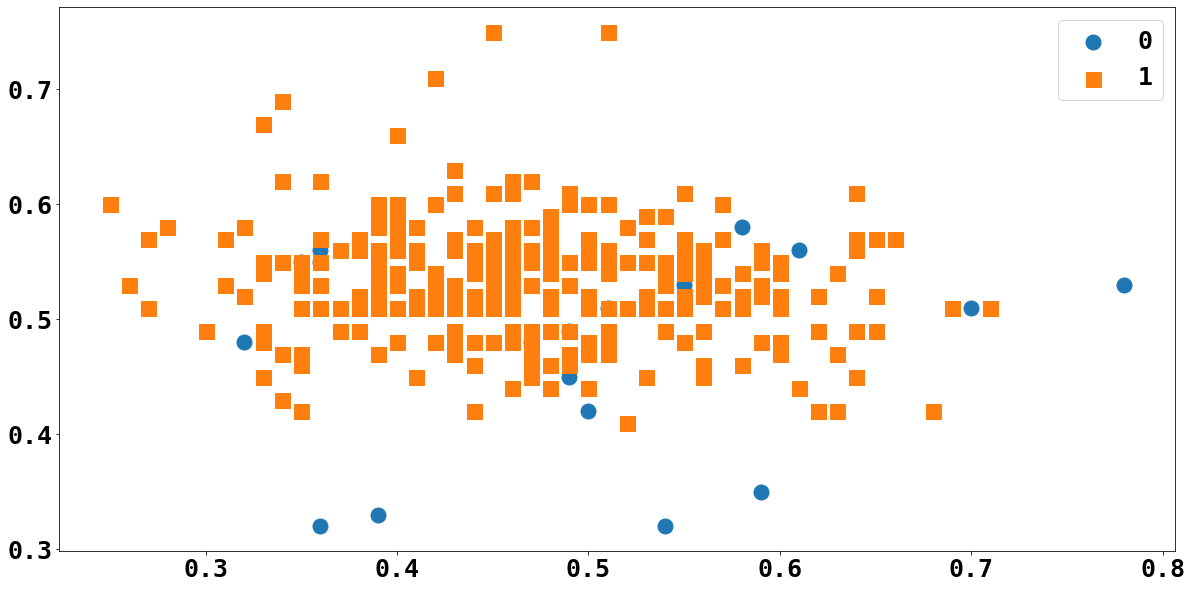

In [1223]:
#plote Imbalanced dataset
plot_2d_space(X_train, y_train, '')

In [1183]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

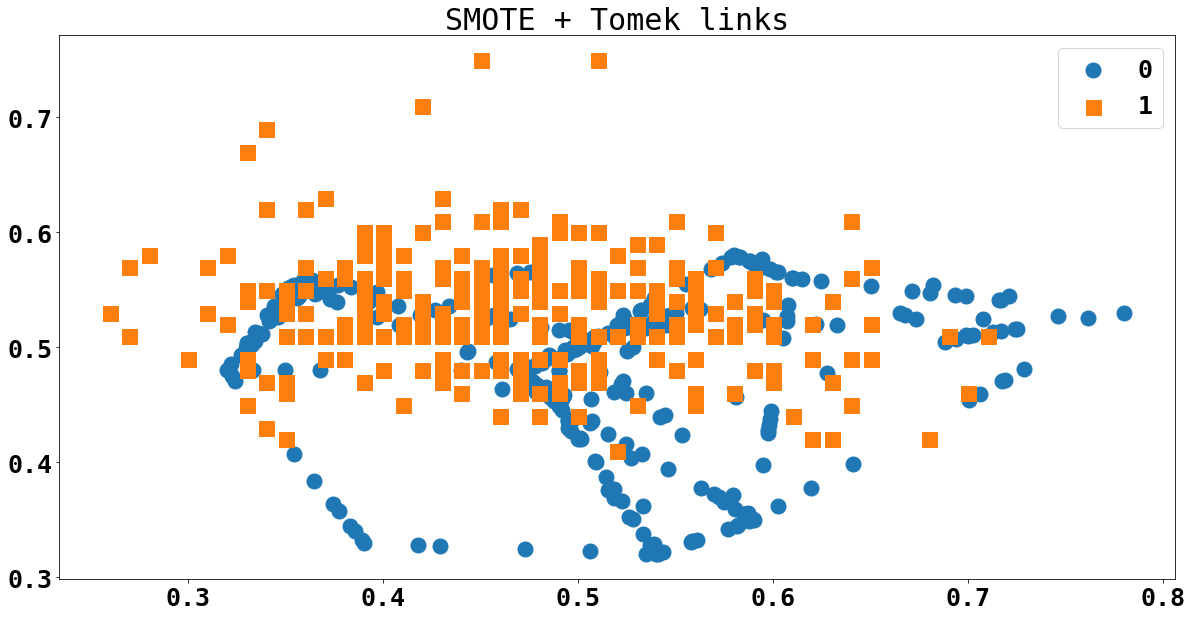

In [1184]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(sampling_strategy='auto')
X_smt, y_smt = smt.fit_resample(X_train, y_train)

plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')

In [1186]:
print(y_smt.value_counts())

1    327
0    327
Name: target, dtype: int64


In [1187]:
#after applying the SMOTETomek algorithem the two classes are balanced 

**Task 10- Try different methods and hyper paramters**


181 new random picked points


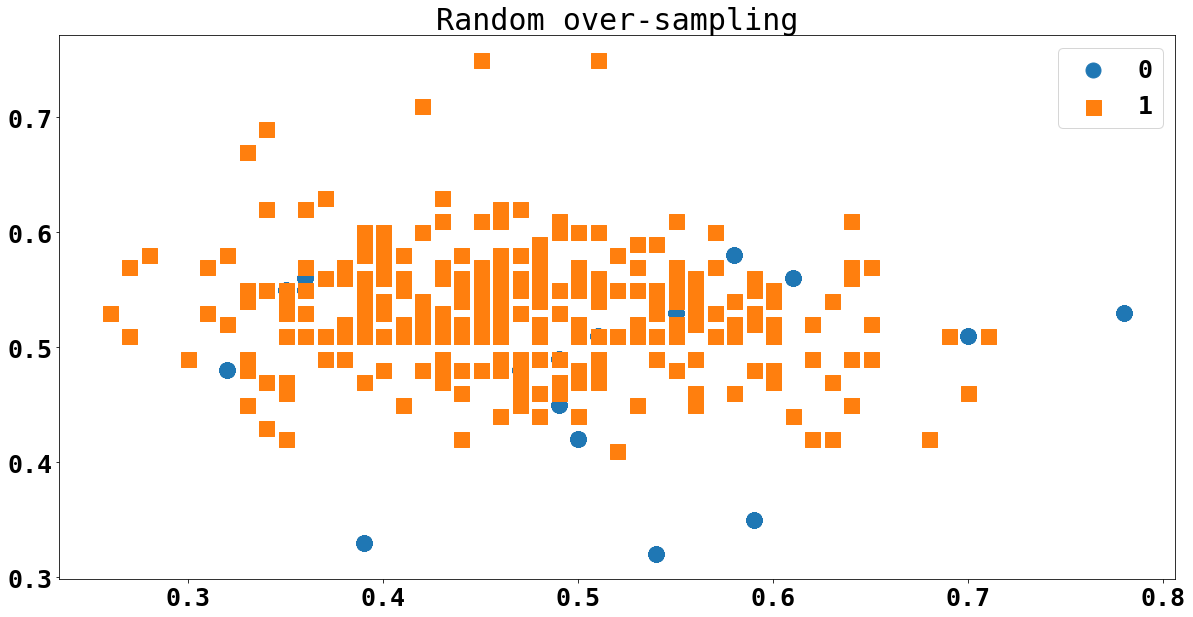

In [1188]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='auto')
X_ros, y_ros = ros.fit_resample(X_train, y_train)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')

In [1189]:
print(y_ros.value_counts())

1    337
0    337
Name: target, dtype: int64


# Random under-sampling

In [1190]:
from imblearn.under_sampling import RandomUnderSampler
# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)


In [1191]:
print(y_train_under.value_counts())

0    17
1    17
Name: target, dtype: int64


**Task 11- Report perfromance using F-1 score**

In [1228]:

model = LinearRegression()
model.fit(X_train_under, y_train_under)
pred = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, pred)
print('MAE: %.3f' % mae)

MAE: 0.604


In [1225]:
y_test.shape, pred.shape

((99,), (99,))

In [1226]:
def get_classification_metric(testy, probs):
    from sklearn.metrics import precision_recall_curve
    precision, recall, thresholds = precision_recall_curve(testy, probs)
    # convert to f score
    fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest f score
    ix = np.argmax(fscore)
    return fscore[ix]

In [1227]:
get_classification_metric(y_test, pred)

0.9578947368421054

https://www.journaldev.com/45165/f1-score-in-python#:~:text=Today%2C%20we%20will%20be%20focusing%20on%20an%20important,helps%20us%20evaluate%20the%20performance%20of%20an%20algorithm.

https://medium.com/swlh/confusion-matrix-and-classification-report-88105288d48f#:~:text=Confusion%20Matrix%20and%20Classification%20Report.%20The%20confusion%20matrix,real%20values%20%28y_test%29%20and%20the%20predicted%20values%20